In [709]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

import io

%matplotlib inline

sns.set_theme(style="white", context="talk")

pylab.rcParams[ 'figure.figsize' ] = 8 , 6

Carga de datasets: descomentar según se use Google Colab o ejecución local.

In [710]:
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))
# new = df.copy()

In [711]:
# from google.colab import files
# uploaded = files.upload()
# store = pd.read_csv(io.StringIO(uploaded['store.csv'].decode('utf-8')))

In [712]:
# from google.colab import files
# uploaded = files.upload()
# test = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))

In [713]:
df = pd.read_csv('dataset/rossmann/train.csv')
new = df.copy()
store = pd.read_csv('dataset/rossmann/store.csv')
test = pd.read_csv('dataset/rossmann/test.csv')

C:\Users\crist\AppData\Local\Temp\ipykernel_4960\1571285140.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/rossmann/train.csv')


Exploración y Manipulación de Datos  
Se realizó EDA y manipulación de los datasets para optimizar el acceso a la información y facilitar su análisis.

In [714]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [715]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [716]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [717]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [718]:
print(df.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [719]:
#separación de la fecha en mes y año

def extractYear(x):
    return int(str(x)[:4]) # extrae el año

def extractMonth(x):
    return int(str(x)[5:7]) # extrae el mes

def extractDay(x):
    return int(str(x)[8:10])

df['Year']  = df['Date'].apply(extractYear)
df['Month'] = df['Date'].apply(extractMonth)
test['Year']  = test['Date'].apply(extractYear)
test['Month'] = test['Date'].apply(extractMonth)

print(df.columns) #se puede ver que se han añadido las columnas Year y Month

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month'],
      dtype='object')


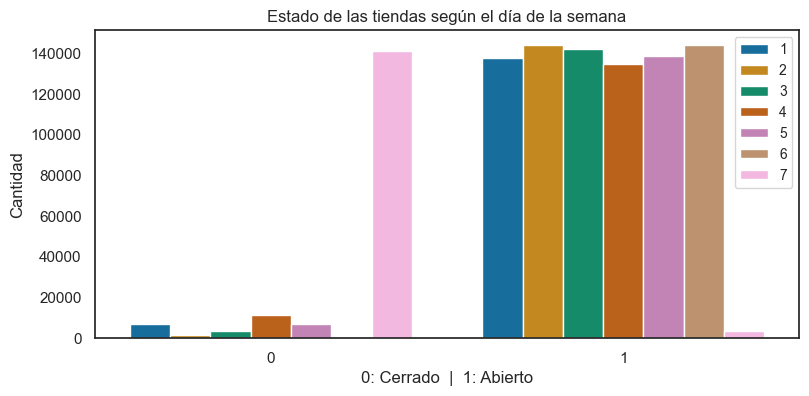

In [720]:
sns.set_theme(style="white", palette="Set2", context="notebook")

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 4))

sns.countplot(x='Open', hue='DayOfWeek', data=df, ax=axis1,
            palette="colorblind")

fig.delaxes(axis2)

axis1.set_xlabel('0: Cerrado  |  1: Abierto')
axis1.set_ylabel('Cantidad')
axis1.set_title('Estado de las tiendas según el día de la semana')

axis1.legend(fontsize='small')

plt.show()

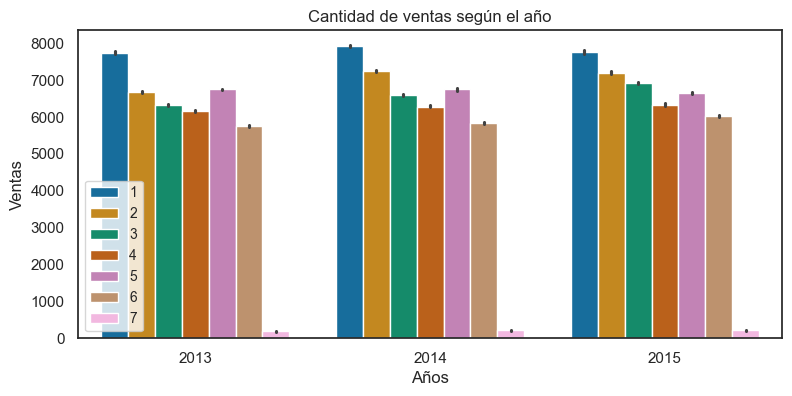

In [721]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 4))

sns.barplot(x='Year', y='Sales', hue='DayOfWeek', data=df, ax=axis1,
            palette="colorblind")

fig.delaxes(axis2)

axis1.set_xlabel('Años')
axis1.set_ylabel('Ventas')
axis1.set_title('Cantidad de ventas según el año')

axis1.legend(fontsize='small')

plt.show()

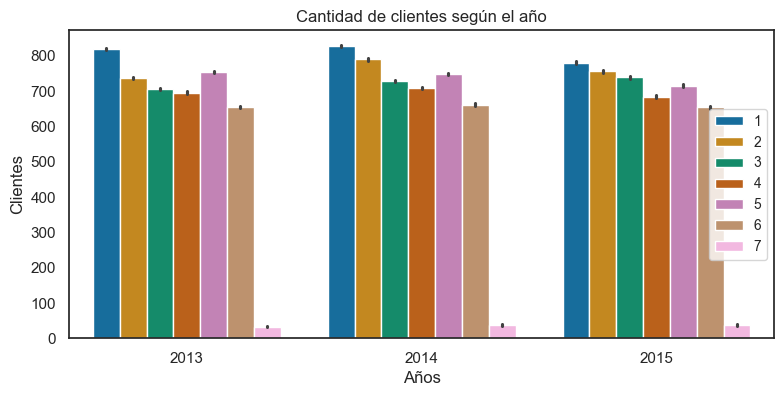

In [722]:
sns.set_theme(style="white", palette="Set2", context="notebook")

fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(20, 4))

sns.barplot(x='Year', y='Customers', hue='DayOfWeek', data=df, ax=axis1,
            palette="colorblind")

fig.delaxes(axis2)

axis1.set_xlabel('Años')
axis1.set_ylabel('Clientes')
axis1.set_title('Cantidad de clientes según el año')

axis1.legend(fontsize='small')

plt.show()

In [723]:
temp = []

# Agrupa el df por la columna 'Store' y calcula el promedio de 'Sales' y 'Customers' para cada tienda
# Luego, itera sobre los valores promedio de 'Sales'
for i in df.groupby('Store')[["Sales", "Customers"]].mean()["Sales"]:
    temp.append(i)

store["Sales"] = temp

In [724]:
temp = []

# Agrupa el df por la columna 'Store' y calcula el promedio de 'Sales' y 'Customers' para cada tienda
# Luego, itera sobre los valores promedio de 'Customers'
for i in df.groupby('Store')[["Sales", "Customers"]].mean()["Customers"]:
  temp.append(i)
store["Customers"] = temp

In [725]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales,Customers
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3945.704883,467.646497
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4122.991507,486.045648
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,8021.769639,1100.057325
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,3867.110403,444.360934


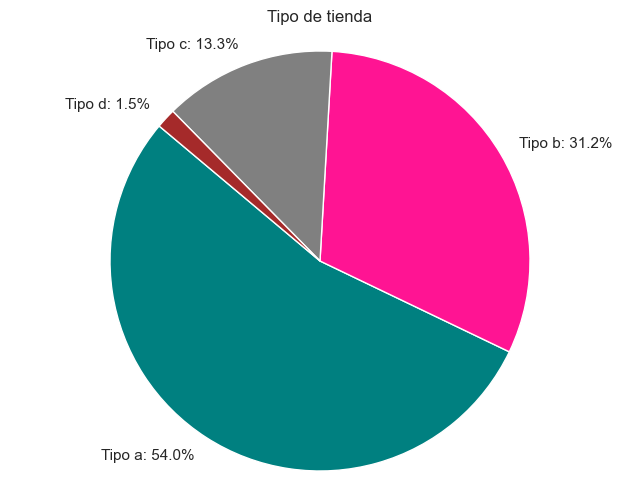

In [726]:
labels = 'Tipo a', 'Tipo b', 'Tipo c', 'Tipo d'

sizes = store.StoreType.value_counts()

colors = ['teal', 'deeppink', 'gray', 'brown']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors,
                                  autopct='%1.1f%%', startangle=140)

ax.axis('equal')

plt.title("Tipo de tienda")

for i, text in enumerate(texts):
    text.set_text(f'{labels[i]}: {autotexts[i].get_text()}')
    autotexts[i].set_text('')

plt.show()

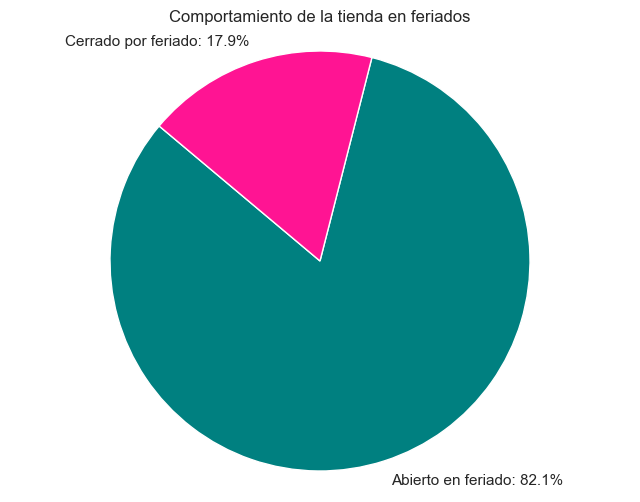

In [727]:
labels = 'Abierto en feriado' , 'Cerrado por feriado'

sizes = df.SchoolHoliday.value_counts()

colors = ['teal', 'deeppink']

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors,
                                  autopct='%1.1f%%', startangle=140)

ax.axis('equal')

plt.title("Comportamiento de la tienda en feriados")

for i, text in enumerate(texts):
    text.set_text(f'{labels[i]}: {autotexts[i].get_text()}')
    autotexts[i].set_text('')

plt.show()

In [728]:
store = pd.read_csv('dataset/rossmann/store.csv')
test = pd.read_csv('dataset/rossmann/test.csv')
df = new.copy()

In [729]:
# completa los valores nulos en test con 1
test.fillna(1, inplace=True)

# filtra df para quedarse solo las filas donde Open=1 (tienda abierta)
df = df[df["Open"] != 0]

# filtra df para quedarse solo las filas donde Sales > 0 (hubo ventas)
df = df[df["Sales"] > 0]

# calculo el logaritmo natural de las ventas
df['log_sales'] = np.log(df['Sales'])

df = pd.merge(df, store, on='Store')

test = pd.merge(test, store, on='Store')

# completa los valores nulos en df con 0
df.fillna(0, inplace=True)

# completa los valores nulos en test con 0
test.fillna(0, inplace=True)

In [730]:
# mapea los valores de StateHoliday en df a valores numéricos
df["StateHoliday"] = df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

# mapea los valores de StateHoliday en test a valores numéricos
test["StateHoliday"] = test["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

df['StateHoliday'] = df['StateHoliday'].astype(float)

test['StateHoliday'] = test['StateHoliday'].astype(float)

In [731]:
# extrae el año en df
df["year"] = df.Date.apply(extractYear)
# extrae el mes en df
df["month"] = df.Date.apply(extractMonth)
# extrae el dia en df
df["Day"] = df.Date.apply(extractDay)

# extrae el año en test
test["year"]=test.Date.apply(extractYear)
# extrae el mes en test
test["month"]=test.Date.apply(extractMonth)
# extrae el dia en test
test["Day"]=test.Date.apply(extractDay)

In [732]:
#conversión de variables categóricas a indicadores
df = pd.get_dummies(df,columns=['StoreType','Assortment','year'])
test = pd.get_dummies(test,columns=['StoreType','Assortment','year'])
test['year_2013']=0
test['year_2014']=0

In [733]:
X = df.drop(['Sales','log_sales','Store','Date','Customers','CompetitionOpenSinceYear','Promo2SinceYear','PromoInterval'] , axis = 1)
y = df['log_sales']

In [734]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=7)
X_test = test.drop(['Id','Store','Date' ,'CompetitionOpenSinceYear','Promo2SinceYear','PromoInterval'] , axis = 1)

In [735]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
xgb_final = XGBRegressor(
    max_depth=25,           # profundidad máxima del árbol
    n_jobs=4,               
    n_estimators=200,       # número de árboles
    learning_rate=0.085,     
    subsample=0.85,          # proporción de muestras
    colsample_bytree=0.85,   # proporción de características
    gamma=0.02,              # umbral de reducción de pérdida
    reg_alpha=0.05,          # regularización L1
    reg_lambda=1             # regularización L2
)
# scores = cross_val_score(xgb_final, X , y , cv=5)
# scores # para evaluar el modelo pero tarda mucho

xgb_final.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.85, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.02, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.085, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=25, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

In [736]:
X_Test = X_test.copy()
a = X_test["year_2015"]
X_test.drop("year_2015" , axis = 1 , inplace = True)
X_test["year_2015"] = a

In [737]:
X_test.columns

Index(['DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2',
       'Promo2SinceWeek', 'month', 'Day', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c', 'year_2013', 'year_2014', 'year_2015'],
      dtype='object')

In [738]:
final_predictions = xgb_final.predict(X_test)

In [739]:
# crea un diccionario con las columnas Id y Sales
# 'Id' se obtiene de test
# 'Sales' se obtiene aplicando la función exponencial a final_predictions
dic = {
    'Id': test['Id'].astype(int),
    'Sales': np.exp(final_predictions)
}

xgb_sub = pd.DataFrame(dic, columns=['Id', 'Sales'])

In [740]:
result = xgb_sub.sort_values(by='Id',ascending=True)
result.to_csv('submission.csv',index=False)

# from google.colab import files
# files.download('submission.csv')